# Relatório sobre Alinhamento de Sequências de DNA - Supercomputação

**Aluno: Antonio Vieira Fuziy**

**Professor: Luciano Silva**

___

Para realização do relatório, é necessário realizar uma contextualização sobre os três algoritmos tratados na atividade. Dentre eles estão os itens representados abaixo:

- Smith Waterman

A implementação do algoritmo de Smith Waterman se baseia mais em exploitation, utilizando um alinhamento local que gera todas as subsequências de todos os tamanhos e compara essas subsequências através de uma matriz, calculando a melhor pontuação possível sempre que uma subsequência comparada se apresenta melhor que as outras anteriores. 

- Busca Local

Para a implementação da busca local a ideia é um pouco diferente, esse algoritmo se baseia mais em exploration e em pouco exploitation, utilizando-se de uma aleatoriedade para gerar as subsequências de diferentes tamanhos, assim através dessas sequências aleatórias calcula-se a pontuação e monta-se as sequências A e B resultantes da melhor pontuação.

- Busca Exaustiva

Por fim, para a implementação da busca exaustiva a ideia é muito focada em exploration, dessa forma ele gera todas as possíveis subsequências a fim de conseguir encontrar a melhor pontuação a partir das duas sequências de entrada.

Bibliotecas para o código

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess
plt.style.use("ggplot")

Lista de algoritmos testados

In [40]:
algorithms = [
    "./smith-waterman/smith_waterman",
    "./busca-local-aleatoria/busca_local_randomness",
    "./busca-exaustiva/exaustive_search"
]

input_directory = "./dna_sequences/all_sequences"

Função para rodar os executáveis de `C++`

In [41]:
def roda_com_entrada(executavel, algorithm):
  with open(algorithm) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()
  return end-start

Função para geração de tempos dos algoritmos

In [42]:
def generate_time(algorithm, directory):
    tempos_busca = []
    dir_list = os.listdir(directory)
    for f in dir_list:
        tempos_busca.append(roda_com_entrada(algorithm,f'{directory}/{f}'))
    return tempos_busca, dir_list

Função para geração de tamanhos das sequências

In [43]:
def generate_length(directory, dir_list):
    n = []
    m = []
    for file in dir_list:
        with open(f'{directory}/{file}') as f :
            text_splitted = f.read().splitlines()
        n.append(text_splitted[0])
        m.append(text_splitted[1])
    n = [int(i) for i in n]
    m = [int(j) for j in m]
    
    return n, m

Executando os algoritmos para as entradas e salvando seus tempos e tamanhos de sequências

In [44]:
tempos_smith, dir_smith = generate_time(algorithms[0], input_directory)
n_smith, m_smith = generate_length(input_directory, dir_smith)

tempos_busca_local, dir_busca_local = generate_time(algorithms[1], input_directory)
n_busca_local, m_busca_local = generate_length(input_directory, dir_busca_local)

tempos_exaustiva, dir_exaustiva = generate_time(algorithms[2], input_directory)
n_exaustiva, m_exaustiva = generate_length(input_directory, dir_exaustiva)

___

### Análise dos algoritmos

Utilizando os tempos de execução dos algoritmos e os tamanhos das sequências A e B geradas, é razoável realizar a análise e comparação dos comportamentos dos três algoritmos com sequências de vários tamanhos, assim abaixo foi exposto os gráfico 3D de **Tamanho da Sequência A X Tamanho da Sequência B X Tempo** para os algoritmos de Smith Waterman, Busca Local e Busca Exaustiva.

**Obs: Vale ressaltar que a análise foi realizada a partir de várias sequências de DNA de tamanhos diferentes, com o tamanho máximo de 300, e assim foi possível construir o relatório com análises mais aprofundadas.**

/tmp/ipykernel_14969/1426767129.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


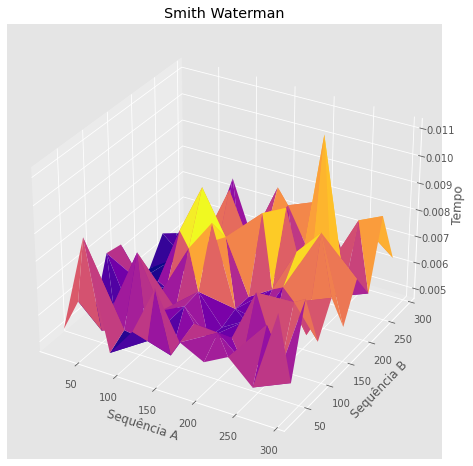

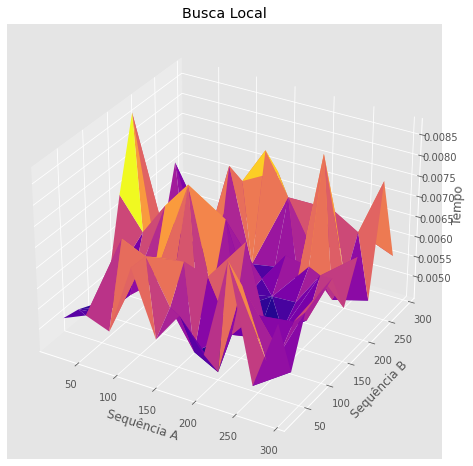

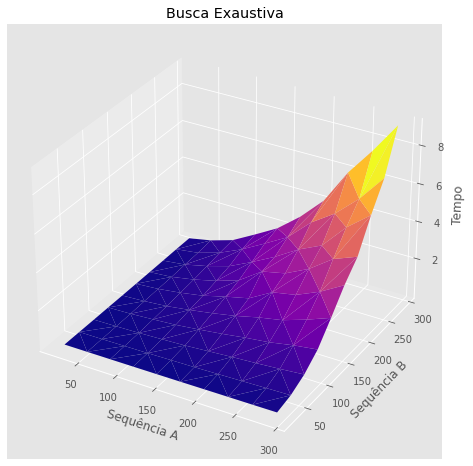

In [45]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_trisurf(n_smith, m_smith, tempos_smith, cmap="plasma")
ax1.set_title("Smith Waterman")
ax1.set_xlabel('Sequência A')
ax1.set_ylabel('Sequência B')
ax1.set_zlabel('Tempo')

fig = plt.figure(figsize=(15, 8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(n_busca_local, m_busca_local, tempos_busca_local, cmap="plasma")
ax2.set_title("Busca Local")
ax2.set_xlabel('Sequência A')
ax2.set_ylabel('Sequência B')
ax2.set_zlabel('Tempo')

fig = plt.figure(figsize=(15, 8))
ax3 = fig.add_subplot(111, projection='3d')
ax3.plot_trisurf(n_exaustiva, m_exaustiva, tempos_exaustiva, cmap="plasma")
ax3.set_title("Busca Exaustiva")
ax3.set_xlabel('Sequência A')
ax3.set_ylabel('Sequência B')
ax3.set_zlabel('Tempo')

fig.show()

Analisando os gráficos acima pode-se identificar alguns comportamentos por parte de cada algortimo:

- **Smith Waterman:**

No gráfico 1, observa-se que as cores mais escuras representam os valores menores de tempo e as cores mais claras representam os valores maiores de tempo, assim pode-se verificar que quando o tamanho das sequências de entrada aumentam, o valor de tempo de processamento tende a aumentar de certa forma, porém existe uma certa variação em alguns casos, gerando picos alguns picos de tempo. Porém no fim pode-se perceber que com o aumento dos tamanhos das sequências de DNA, o gráfico tende a ficar com cores mais claras, mostrando que o tempo de execução torna-se maior com essa variação. 

- **Busca Local:**

No gráfico 2 o comportamento apresenta-se um pouco diferente, uma vez que o algoritmo funciona a partir de uma geração aleatória de subsequências baseadas nas sequências de entrada, dessa forma o tempo de processamento vai variar independentemente das sequências de entrada, visto que não existe um padrão nos tamanhos delas, portanto o gráfico apresenta várias mudanças de cores e muita variação o tempo todo.

- **Busca Exaustiva:**

No gráfico 3, o comportamento é mais visível, uma vez que a busca exaustiva gera todas as subsequências possíveis das entradas, dessa forma quanto maior o tamanho da entrada, maior o tamanho das subsequências geradas e assim maior o tempo de processamento para o cálculo da pontuação, portanto o gŕafico apresenta um comportamento exponencial, começando com cores mais escuras quando as sequências de entrada são menores e conforme o aumento delas, o gráfico tende a ficar mais clara, demonstrando o aumento do tempo de execução. 


___

### Profiling

Para uma análise dos tempos de execução e dos pontos de lentidão dos códigos utilizou-se o `valgrind`, dessa forma foi representado abaixo cada uma das análises dos três algoritmos (Smith Waterman, Busca Local e Busca Exaustiva).

- **Smith Waterman:**

![profiling smith waterman](smith_waterman_valgrind.png)

Observando-se o profiling do algoritmo de Smith Waterman pode-se verificar que o local de mais lentidão na sua implementação está localizado onde gera-se a matriz H, uma vez que precisa-se gerar todas as subsequências a partir das entradas, dessa forma o número de iterações nessa parte do programa tende a ser maior.

- **Busca Local:**

![profiling busca_local](busca_local_valgrind.png)

Para a implementação da busca local, como as subsequências geradas são aleatórias, o processamento tende a ser muito menor, porém observando o profiling, identifica-se que os momentos em que geram-se as subsequências A e B são os locais de mais lentidão do código, porém como o processamento do código é muito rápido não faz tanta diferença.

- **Busca Exaustiva:**

![profiling busca_exaustiva](busca_exaustiva_valgrind.png)

Por fim, para implementação da busca exaustiva, espera-se que o processamento demore muito mais, visto que esse algoritmo gera todas as subsequências possíveis, dessa forma observando o profiling da busca exaustiva pode-se perceber que a maior lentidão do algoritmo está presente nos loops sobre as subsequências e no cálculo da pontuação da melhor subsequência, uma vez que existem 3 for's um dentro do outro nesse fragmento do código, gerando assim milhões de iterações do algortimo.